Steps:
1. generate rollouts over example prompts
2. compute and store activations over all tokens all layers
3. test out each of the hypotheses
4. try make a progress bar

# 1. Generate rollouts over prompts

In [1]:
import vllm
import torch

In [ ]:
# Load Gemma 2 2B Instruct model with vLLM
model_name = "Qwen/Qwen3-4B"
llm = vllm.LLM(
    model=model_name,
    trust_remote_code=True,    
    dtype=torch.bfloat16,
    tensor_parallel_size=1,
    gpu_memory_utilization=0.7,
)

INFO 09-30 22:48:50 [__init__.py:216] Automatically detected platform cuda.
INFO 09-30 22:48:51 [utils.py:328] non-default args: {'trust_remote_code': True, 'dtype': torch.bfloat16, 'gpu_memory_utilization': 0.7, 'disable_log_stats': True, 'model': 'Qwen/Qwen3-4B'}


The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.


INFO 09-30 22:49:00 [__init__.py:742] Resolved architecture: Qwen3ForCausalLM


`torch_dtype` is deprecated! Use `dtype` instead!


INFO 09-30 22:49:00 [__init__.py:1815] Using max model len 40960
INFO 09-30 22:49:01 [scheduler.py:222] Chunked prefill is enabled with max_num_batched_tokens=8192.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

(EngineCore_DP0 pid=1307) INFO 09-30 22:49:04 [core.py:654] Waiting for init message from front-end.
(EngineCore_DP0 pid=1307) INFO 09-30 22:49:04 [core.py:76] Initializing a V1 LLM engine (v0.10.2) with config: model='Qwen/Qwen3-4B', speculative_config=None, tokenizer='Qwen/Qwen3-4B', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=True, dtype=torch.bfloat16, max_seq_len=40960, download_dir=None, load_format=auto, tensor_parallel_size=1, pipeline_parallel_size=1, data_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, device_config=cuda, decoding_config=DecodingConfig(backend='auto', disable_fallback=False, disable_any_whitespace=False, disable_additional_properties=False, reasoning_backend=''), observability_config=ObservabilityConfig(show_hidden_metrics_for_version=None, otlp_traces_endpoint=None, collect_detailed_traces=None), seed=0, served_model_name=Qwen/Qwen3-4B

[W930 22:49:06.340741264 ProcessGroupNCCL.cpp:981] Warning: TORCH_NCCL_AVOID_RECORD_STREAMS is the default now, this environment variable is thus deprecated. (function operator())


[Gloo] Rank 0 is connected to 0 peer ranks. Expected number of connected peer ranks is : 0
[Gloo] Rank 0 is connected to 0 peer ranks. Expected number of connected peer ranks is : 0
[Gloo] Rank 0 is connected to 0 peer ranks. Expected number of connected peer ranks is : 0
[Gloo] Rank 0 is connected to 0 peer ranks. Expected number of connected peer ranks is : 0
[Gloo] Rank 0 is connected to 0 peer ranks. Expected number of connected peer ranks is : 0
[Gloo] Rank 0 is connected to 0 peer ranks. Expected number of connected peer ranks is : 0
(EngineCore_DP0 pid=1307) INFO 09-30 22:49:07 [gpu_model_runner.py:2370] Loading model from scratch...
(EngineCore_DP0 pid=1307) INFO 09-30 22:49:07 [cuda.py:362] Using Flash Attention backend on V1 engine.
(EngineCore_DP0 pid=1307) INFO 09-30 22:49:07 [weight_utils.py:348] Using model weights format ['*.safetensors']


model-00001-of-00003.safetensors:   0%|          | 0.00/3.96G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/3.99G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/99.6M [00:00<?, ?B/s]

(EngineCore_DP0 pid=1307) INFO 09-30 22:49:27 [weight_utils.py:369] Time spent downloading weights for Qwen/Qwen3-4B: 19.819555 seconds


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Loading safetensors checkpoint shards:   0% Completed | 0/3 [00:00<?, ?it/s]


(EngineCore_DP0 pid=1307) INFO 09-30 22:49:29 [default_loader.py:268] Loading weights took 1.51 seconds
(EngineCore_DP0 pid=1307) INFO 09-30 22:49:30 [gpu_model_runner.py:2392] Model loading took 7.5552 GiB and 22.116411 seconds
(EngineCore_DP0 pid=1307) INFO 09-30 22:49:35 [backends.py:539] Using cache directory: /root/.cache/vllm/torch_compile_cache/6f945c34e0/rank_0_0/backbone for vLLM's torch.compile
(EngineCore_DP0 pid=1307) INFO 09-30 22:49:35 [backends.py:550] Dynamo bytecode transform time: 5.14 s
(EngineCore_DP0 pid=1307) INFO 09-30 22:49:39 [backends.py:194] Cache the graph for dynamic shape for later use
(EngineCore_DP0 pid=1307) INFO 09-30 22:50:01 [backends.py:215] Compiling a graph for dynamic shape takes 25.23 s
(EngineCore_DP0 pid=1307) INFO 09-30 22:50:05 [monitor.py:34] torch.compile takes 30.37 s in total
(EngineCore_DP0 pid=1307) INFO 09-30 22:50:06 [gpu_worker.py:298] Available KV cache memory: 46.40 GiB
(EngineCore_DP0 pid=1307) INFO 09-30 22:50:07 [kv_cache_utils

Capturing CUDA graphs (mixed prefill-decode, PIECEWISE): 100%|██████████| 67/67 [00:02<00:00, 27.87it/s]


(EngineCore_DP0 pid=1307) INFO 09-30 22:50:10 [gpu_model_runner.py:3118] Graph capturing finished in 3 secs, took 0.61 GiB
(EngineCore_DP0 pid=1307) INFO 09-30 22:50:10 [gpu_worker.py:391] Free memory on device (78.65/79.14 GiB) on startup. Desired GPU memory utilization is (0.7, 55.4 GiB). Actual usage is 7.56 GiB for weight, 1.43 GiB for peak activation, 0.02 GiB for non-torch memory, and 0.61 GiB for CUDAGraph memory. Replace gpu_memory_utilization config with `--kv-cache-memory=49009093836` to fit into requested memory, or `--kv-cache-memory=73978126336` to fully utilize gpu memory. Current kv cache memory in use is 49816497356 bytes.
(EngineCore_DP0 pid=1307) INFO 09-30 22:50:10 [core.py:218] init engine (profile, create kv cache, warmup model) took 40.65 seconds
INFO 09-30 22:50:11 [llm.py:295] Supported_tasks: ['generate']
INFO 09-30 22:50:11 [__init__.py:36] No IOProcessor plugins requested by the model


ERROR 09-30 23:18:12 [core_client.py:564] Engine core proc EngineCore_DP0 died unexpectedly, shutting down client.


In [3]:
import json

# Load instructions from splits/harmless_train.json
with open('splits/harmless_train.json', 'r') as f:
    data = json.load(f)

# Get the tokenizer to apply chat template
tokenizer = llm.get_tokenizer()

# Apply chat template to each instruction
instructions = []
for item in data:
    # Format as a chat message
    messages = [{"role": "user", "content": item['instruction']}]
    # Apply the chat template
    formatted_instruction = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
    instructions.append(formatted_instruction)

print(f"Loaded {len(instructions)} instructions with chat template applied")


Loaded 18794 instructions with chat template applied


In [4]:
# Run vLLM in parallel over all instructions
outputs = llm.generate(instructions[:2000], sampling_params=vllm.SamplingParams(max_tokens=32768))

Adding requests:   0%|          | 0/2000 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/2000 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s…

In [5]:
responses = [{'instruction': y, 'response': x.outputs[0].text, 'char_length': len(x.outputs[0].text), 'tokens_length': len(x.outputs[0].token_ids)} for x,y in zip(outputs, instructions)]

In [6]:
# Save responses to JSON file
import json
import os

# Create directory if it doesn't exist
os.makedirs('/workspace/llm-progress-monitor/rollouts', exist_ok=True)

# Save to JSON file
with open(f'/workspace/llm-progress-monitor/rollouts/{model_name.split("/")[-1]}.json', 'w') as f:
    json.dump(responses, f, indent=2)

print(f"Saved {len(responses)} responses to /workspace/llm-progress-monitor/rollouts/{model_name.split('/')[-1]}.json")

Saved 2000 responses to /workspace/llm-progress-monitor/rollouts/Qwen3-4B.json


# 2. Compute and store activations over all tokens all layers

In [7]:
import nnsight
import torch
import json
from transformers import AutoTokenizer
model_name = "Qwen/Qwen3-4B"

In [8]:
with open(f'/workspace/llm-progress-monitor/rollouts/{model_name.split("/")[-1]}.json', 'r') as f:
    responses = json.load(f)

In [9]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [10]:
# Format each response with Gemma 2 chat template
formatted_responses = []
for response in responses:
    # Apply Gemma 2 chat template format
    chat_formatted = tokenizer.apply_chat_template(
        [
            {"role": "user", "content": response['instruction']},
            {"role": "assistant", "content": response['response']}
        ],
        tokenize=False,
        add_generation_prompt=False
    )
    
    formatted_item = {
        'instruction': response['instruction'],
        'response': response['response'],
        'chat_formatted': chat_formatted,
        'char_length': response['char_length'],
        'tokens_length': response['tokens_length']
    }
    formatted_responses.append(formatted_item)

In [11]:
import os
import gc
# Create activations directory if it doesn't exist
activations_dir = '/workspace/llm-progress-monitor/rollouts/activations'
os.makedirs(activations_dir, exist_ok=True)

model = nnsight.LanguageModel(model_name, device_map="auto", dtype=torch.bfloat16)

In [57]:
with torch.no_grad():
    for i, formatted_response in enumerate(formatted_responses[:1000]):
        gc.collect()
        torch.cuda.empty_cache()
        chat_formatted = formatted_response['chat_formatted']
        input_ids_len = len(tokenizer.encode(tokenizer.apply_chat_template([{"role": "user", "content": formatted_response['instruction']}], tokenize=False, add_generation_prompt=True), return_tensors='pt')[0])

        activations = None
        
        # Tokenize the chat
        with model.trace(chat_formatted): #TODO: change to batched.
            gc.collect()
            torch.cuda.empty_cache()
            layer_outputs = []
            for layer in model.model.layers:
                layer_outputs.append(layer.output[0][input_ids_len:])
            activations = torch.stack(layer_outputs, dim=0)
                
        torch.save(activations, f'{activations_dir}/{i}.pt')
        print(f"Saved activations for response {i}")

Saved activations for response 0
Saved activations for response 1
Saved activations for response 2
Saved activations for response 3
Saved activations for response 4
Saved activations for response 5
Saved activations for response 6
Saved activations for response 7
Saved activations for response 8
Saved activations for response 9
Saved activations for response 10
Saved activations for response 11
Saved activations for response 12
Saved activations for response 13
Saved activations for response 14
Saved activations for response 15
Saved activations for response 16
Saved activations for response 17
Saved activations for response 18
Saved activations for response 19
Saved activations for response 20
Saved activations for response 21
Saved activations for response 22
Saved activations for response 23
Saved activations for response 24
Saved activations for response 25
Saved activations for response 26
Saved activations for response 27
Saved activations for response 28
Saved activations for re

# 3. Test out each hypothesis

- Linear n_tokens_remaining
- Logarithmic n_tokens_remaining
- Linear % of response left
- Linear n_total_tokens
- Rotation around a circle to track n_tokens_remaining modulo something?


In [1]:
!pip install aiofiles


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
from torch.utils.data import DataLoader, Dataset
from typing import List
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import gc

In [3]:
import os
activations_dir = '/workspace/llm-progress-monitor/rollouts/activations'
layer_idx = 15
activations = []

with torch.no_grad():
    import asyncio
    import aiofiles

    async def load_activation_async(filename_path):
        """Load a single activation file asynchronously"""
        if os.path.exists(filename_path):
            # Use async file reading with torch.load
            loop = asyncio.get_event_loop()
            activation = await loop.run_in_executor(None, torch.load, filename_path)
            return activation[layer_idx].to('cpu')
        return None

    async def load_batch_async(start_idx, end_idx):
        """Load a batch of activations asynchronously"""
        tasks = []
        for i in range(start_idx, end_idx):
            filename_path = os.path.join(activations_dir, f'{i}.pt')
            tasks.append(load_activation_async(filename_path))
        
        results = await asyncio.gather(*tasks)
        return [result for result in results if result is not None]

    async def load_all_activations_async():
        """Load all activations using async I/O"""
        batch_size = 100
        total_samples = 1000
        batches = [(i, min(i + batch_size, total_samples)) for i in range(0, total_samples, batch_size)]
        
        activations = []
        for i, (start, end) in enumerate(batches):
            batch_activations = await load_batch_async(start, end)
            activations.extend(batch_activations)
            print(f"Loaded batch {i+1}/{len(batches)}: {len(batch_activations)} activations")
            gc.collect()
            torch.cuda.empty_cache()
        
        return activations

    # Run the async loading - use await directly in Jupyter
    activations = await load_all_activations_async()

    print(f"Total activations loaded: {len(activations)}")

    # Train-test split on activations
    from sklearn.model_selection import train_test_split

    train_activations, test_activations = train_test_split(activations, test_size=0.2, random_state=42)
    print(f"Train set size: {len(train_activations)}")
    print(f"Test set size: {len(test_activations)}")

    class TokensRemainingDataset(Dataset):
        def __init__(self, activations: List[torch.Tensor]):
            self.data = []
            for activation in activations:
                for i in range(activation.shape[0]):
                    self.data.append((activation[i, :], activation.shape[0] - i, activation.shape[0]))

        def __len__(self):
            return len(self.data)
        
        def __getitem__(self, idx):
            return self.data[idx]

    train_dataset = TokensRemainingDataset(train_activations)
    train_dataloader = DataLoader(train_dataset, batch_size=1024, shuffle=True)
    test_dataset = TokensRemainingDataset(test_activations)
    test_dataloader = DataLoader(test_dataset, batch_size=1024, shuffle=True)

Loaded batch 1/10: 100 activations
Loaded batch 2/10: 100 activations
Loaded batch 3/10: 100 activations
Loaded batch 4/10: 100 activations
Loaded batch 5/10: 100 activations
Loaded batch 6/10: 100 activations
Loaded batch 7/10: 100 activations
Loaded batch 8/10: 100 activations
Loaded batch 9/10: 100 activations
Loaded batch 10/10: 100 activations
Total activations loaded: 1000
Train set size: 800
Test set size: 200


## 3.1 Linear n_tokens_remaining (ignore)

In [106]:
class LinearRegression(nn.Module):
    def __init__(self,input_dim: int):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)

In [107]:
model = LinearRegression(train_dataset[0][0].shape[0]).to('cuda')
adam = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()
losses = []

In [109]:
for epoch in range(10):
    for index, (X, y, _) in enumerate(train_dataloader):
        model.train()
        adam.zero_grad()
        pred = model(X.to('cuda', dtype=torch.float32)).squeeze(-1)
        loss = loss_fn(pred, y.to('cuda', dtype=torch.float32))
        loss.backward()
        adam.step()
        losses.append(loss.item())

        if index % 10 == 0:
            model.eval()
            with torch.no_grad():
                for X, y, total_tokens in test_dataloader:
                    total_tokens = total_tokens.to('cuda', dtype=torch.float32)
                    y = y.to('cuda', dtype=torch.float32)
                    pred = model(X.to('cuda', dtype=torch.float32)).squeeze(-1)
                    pred_loss = loss_fn(pred, y)

            print(f"Step {index}, Training Loss: {loss.item():.4f}, Test Loss: {pred_loss:.4f}")

Step 0, Training Loss: 1857018.2500, Test Loss: 1275384.0000
Step 10, Training Loss: 1925102.8750, Test Loss: 1349093.5000
Step 20, Training Loss: 1870966.2500, Test Loss: 1196826.1250
Step 30, Training Loss: 1957349.0000, Test Loss: 1332225.6250
Step 40, Training Loss: 1563023.3750, Test Loss: 1271792.6250
Step 50, Training Loss: 1699308.0000, Test Loss: 1345718.1250
Step 60, Training Loss: 1602556.5000, Test Loss: 1293209.1250
Step 70, Training Loss: 1482913.3750, Test Loss: 1309525.3750
Step 80, Training Loss: 1553446.0000, Test Loss: 1351931.3750
Step 90, Training Loss: 1636801.5000, Test Loss: 1434642.3750
Step 100, Training Loss: 1466897.6250, Test Loss: 1466167.0000
Step 0, Training Loss: 1655698.0000, Test Loss: 1159026.5000
Step 10, Training Loss: 1981779.6250, Test Loss: 1277734.1250
Step 20, Training Loss: 1678875.7500, Test Loss: 1282669.3750
Step 30, Training Loss: 1657263.7500, Test Loss: 1235831.0000
Step 40, Training Loss: 1555017.2500, Test Loss: 1251004.1250
Step 50, 

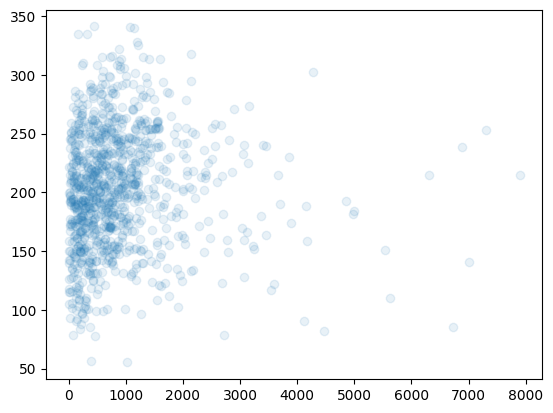

In [110]:
x, y, _ = next(iter(train_dataloader))
x = x.to('cuda', dtype=torch.float32)
y = y.to('cuda', dtype=torch.float32)
preds = model(x)
preds = preds.detach().cpu().numpy()
y = y.detach().cpu().numpy()
preds = preds.flatten()
plt.scatter(y, preds, alpha=0.1)

  0%|          | 0/15984 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|█████████▉| 15975/15984 [03:17<00:00, 87.95it/s]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([43])) that is different to the input size (torch.Size([43, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 15984/15984 [03:17<00:00, 80.95it/s]
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (tor

Average test loss: 0.0428


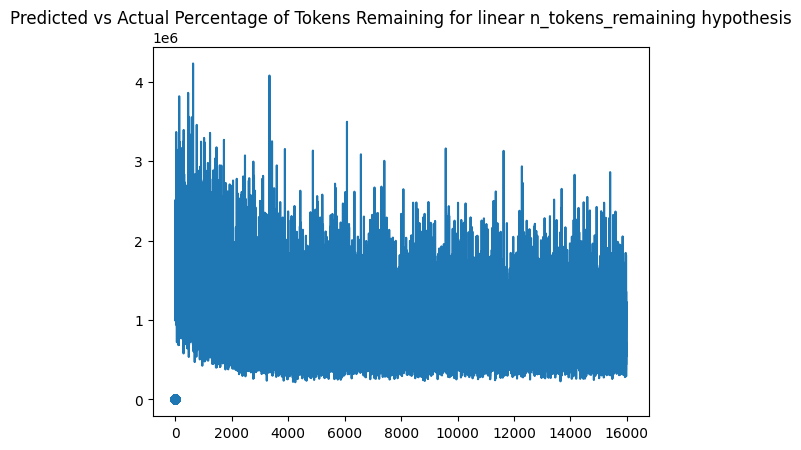

In [64]:
class LinearRegression(nn.Module):
    def __init__(self,input_dim: int):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)
model = LinearRegression(train_dataset[0][0].shape[0]).to('cuda')
adam = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()
losses = []
for X, y, _ in tqdm(train_dataloader):
    adam.zero_grad()
    pred = model(X.to('cuda', dtype=torch.float32))
    loss = loss_fn(pred, y.to('cuda', dtype=torch.float32))
    loss.backward()
    adam.step()
    losses.append(loss.item())
import matplotlib.pyplot as plt
plt.title('Training Loss for linear n_tokens_remaining hypothesis')
plt.plot(losses)
# Evaluate test loss
test_losses = []
preds = []
actuals = []
model.eval()
with torch.no_grad():
    for X, y, total_tokens in test_dataloader:
        total_tokens = total_tokens.to('cuda', dtype=torch.float32)
        y = y.to('cuda', dtype=torch.float32)
        pred = model(X.to('cuda', dtype=torch.float32))
        tokens_already_seen = total_tokens - y
        percentage_pred = torch.clamp(pred/(pred + tokens_already_seen), 0.0, 1.0)
        actual_percentage = y/total_tokens
        loss = loss_fn(percentage_pred, actual_percentage)
        test_losses.append(loss.item())
        preds += percentage_pred[0].tolist()
        actuals += actual_percentage.tolist()
average_test_loss = sum(test_losses) / len(test_losses)
print(f"Average test loss: {average_test_loss:.4f}")

#for X, y, _ in test_dataloader:
#    print(y)
#    break
preds
plt.title('Predicted vs Actual Percentage of Tokens Remaining for linear n_tokens_remaining hypothesis')
plt.scatter(preds, actuals)

## 3.2 Logarithmic n_tokens remaining (ignore)

In [ ]:
import matplotlib.pyplot as plt
class NonLinearRegression(nn.Module):
    def __init__(self,input_dim: int):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)
model = NonLinearRegression(train_dataset[0][0].shape[0]).to('cuda')
adam = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()
def evaluate_model(model, test_dataloader, loss_fn):
    preds = []
    actuals = []
    model.eval()
    with torch.no_grad():
        for X, y, total_tokens in test_dataloader:
            total_tokens = total_tokens.to('cuda', dtype=torch.float32)
            y = y.to('cuda', dtype=torch.float32)
            pred = model(X.to('cuda', dtype=torch.float32)).exp()
            preds += pred.flatten().tolist()
            actuals += (y+1).log().flatten().tolist()
    return preds, actuals
losses = []

for i,(X, y, total_tokens) in enumerate(tqdm(train_dataloader)):
    y = y.to('cuda', dtype=torch.float32)
    total_tokens = total_tokens.to('cuda', dtype=torch.float32)
    adam.zero_grad()
    pred = model(X.to('cuda', dtype=torch.float32))
    loss = loss_fn(pred, (y+1).log())
    loss.backward()
    adam.step()
    losses.append(loss.item())
    if i % 50 == 0:
        preds, actuals = evaluate_model(model, test_dataloader, loss_fn)
        plt.title('Predicted vs Actual Percentage of Tokens Remaining for logarithmic n_tokens_remaining hypothesis')
        plt.scatter(preds, actuals)
        plt.show()
plt.title('Training Loss for logarithmic n_tokens_remaining hypothesis')
plt.plot(losses)
losses
preds, actuals = evaluate_model(model, train_dataloader, loss_fn)
plt.scatter(preds, torch.tensor(actuals))
for X,y, _ in train_dataloader:
    print(X.shape, y.shape)
    break
X

## 3.5 Rotation (leading hypothesis)

In [4]:
n_bins = 20
def bin_y(y, base=1.6):
    y_float = y.to(device='cuda', dtype=torch.float32)
    log_base = torch.log(torch.tensor(base, device=y_float.device, dtype=y_float.dtype))
    bins = torch.log1p(y_float) / log_base
    return bins.floor().clamp(0, n_bins - 1).to(torch.long)
# ...existing code...

In [8]:
class LogBinClassifier(nn.Module):
    def __init__(self,input_dim: int):
        super().__init__()
        self.linear = nn.Linear(input_dim, n_bins, dtype=torch.bfloat16)

    def forward(self, x):
        return self.linear(x)
    
model = LogBinClassifier(train_dataset[0][0].shape[0]).to('cuda')
adam = optim.Adam(model.parameters(), lr=0.001)
# Calculate class frequencies from training data
class_counts = torch.zeros(n_bins)
total_samples = 0

for X, y, _ in train_dataloader:
    y_binned = bin_y(y)
    for i in range(n_bins):
        class_counts[i] += (y_binned == i).sum().item()
    total_samples += len(y)

# Calculate inverse frequency weights
weight = total_samples / (n_bins * class_counts)
weight = weight.to('cuda', dtype=torch.bfloat16)
print("Class frequencies:", class_counts)
print("Weights:", weight)
losses = []
test_losses = []

Class frequencies: tensor([     0.,    800.,   1600.,   1600.,   3200.,   4800.,   8000.,  12800.,
         20800.,  32800.,  52770.,  84301., 128850., 182239., 222500., 164304.,
         65390.,  25027.,   9748.,   1426.])
Weights: tensor([    inf, 64.0000, 32.0000, 32.0000, 16.0000, 10.6250,  6.4062,  4.0000,
         2.4531,  1.5625,  0.9688,  0.6055,  0.3965,  0.2812,  0.2295,  0.3105,
         0.7812,  2.0469,  5.2500, 35.7500], device='cuda:0',
       dtype=torch.bfloat16)


In [9]:
loss_fn = nn.CrossEntropyLoss(weight = weight)
#loss_fn = nn.CrossEntropyLoss()

In [10]:
n_epochs = 1
adam = optim.Adam(model.parameters(), lr=0.001)
for epoch in range(n_epochs):
    for i, (X, y, _) in enumerate(train_dataloader):
        model.zero_grad()

        preds = model(X.to('cuda'))
        y_transformed = bin_y(y)
        loss = loss_fn(preds, y_transformed)
        loss.backward()
        adam.step()
        losses.append(loss.item())
        
        # Calculate test loss
        if i % 10 == 0:  # Calculate test loss every 10 batches
            model.eval()
            test_loss_sum = 0
            test_batches = 0
            with torch.no_grad():
                for X_test, y_test, _ in test_dataloader:
                    preds_test = model(X_test.to('cuda'))
                    y_test_transformed = bin_y(y_test)
                    test_loss = loss_fn(preds_test, y_test_transformed)
                    test_loss_sum += test_loss.item()
                    test_batches += 1
            test_losses.append(test_loss_sum / test_batches)
            model.train()
        
        if i % 10 == 0 and test_losses:
            print(f"Batch {i}, Train Loss: {loss.item():.4f}")
            print(f"Test Loss: {test_losses[-1]:.4f}")

Batch 0, Train Loss: 3.1406
Test Loss: 3.0800
Batch 10, Train Loss: 2.2344
Test Loss: 2.4026
Batch 20, Train Loss: 2.1406
Test Loss: 2.1951
Batch 30, Train Loss: 2.1406
Test Loss: 2.1045
Batch 40, Train Loss: 1.7500
Test Loss: 2.0380
Batch 50, Train Loss: 1.9922
Test Loss: 1.9936
Batch 60, Train Loss: 1.6953
Test Loss: 1.9638
Batch 70, Train Loss: 1.6328
Test Loss: 1.9354
Batch 80, Train Loss: 1.6641
Test Loss: 1.9111
Batch 90, Train Loss: 1.5078
Test Loss: 1.8964
Batch 100, Train Loss: 1.6797
Test Loss: 1.8804
Batch 110, Train Loss: 1.9062
Test Loss: 1.8650
Batch 120, Train Loss: 1.6641
Test Loss: 1.8513
Batch 130, Train Loss: 1.4609
Test Loss: 1.8457
Batch 140, Train Loss: 1.5938
Test Loss: 1.8360
Batch 150, Train Loss: 1.5469
Test Loss: 1.8218
Batch 160, Train Loss: 1.5859
Test Loss: 1.8233
Batch 170, Train Loss: 1.7891
Test Loss: 1.8140
Batch 180, Train Loss: 1.2578
Test Loss: 1.8135
Batch 190, Train Loss: 1.4766
Test Loss: 1.8110
Batch 200, Train Loss: 1.4766
Test Loss: 1.8005
Bat

In [12]:
import matplotlib.pyplot as plt

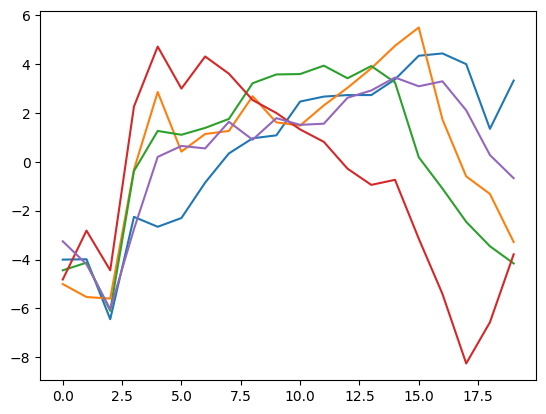

In [13]:
plt.plot(preds[:5].T.cpu().detach().to(torch.float32).numpy())
plt.show()

In [14]:
torch.save(model.linear.weight, '/workspace/llm-progress-monitor/qwen3_4b_weight_tensor.pt')

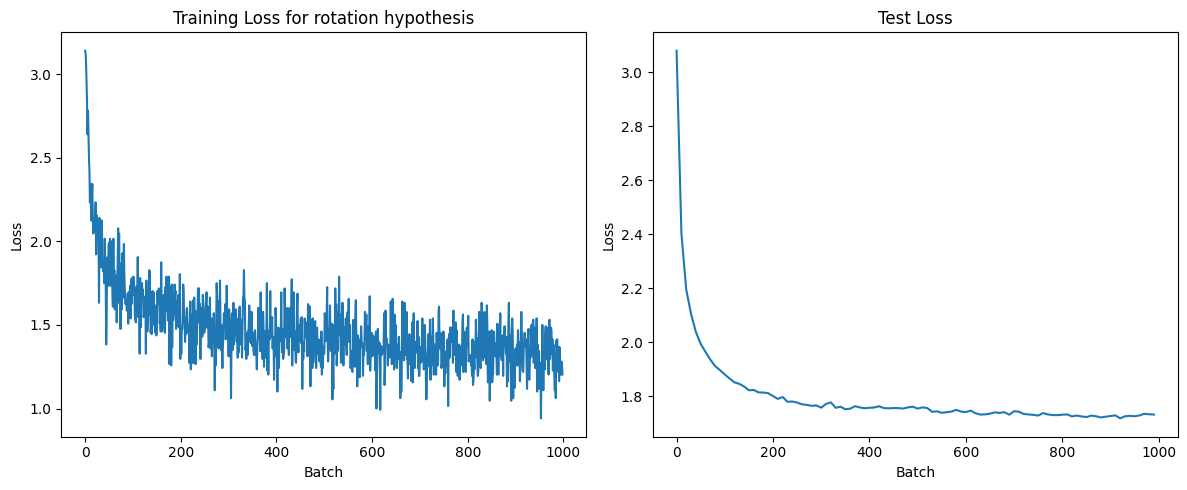

tensor([12, 15, 13,  ..., 14, 12, 13], device='cuda:0')

In [15]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Training Loss for rotation hypothesis')
plt.plot(losses)
plt.xlabel('Batch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.title('Test Loss')
# Fix the x-axis to match the length of test_losses
test_x_values = [i for i in range(0, len(losses), 10) if i // 10 < len(test_losses)]
plt.plot(test_x_values, test_losses[:len(test_x_values)])
plt.xlabel('Batch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

model.zero_grad()
preds = model(X.to('cuda'))
preds.argmax(dim=1)
y_transformed


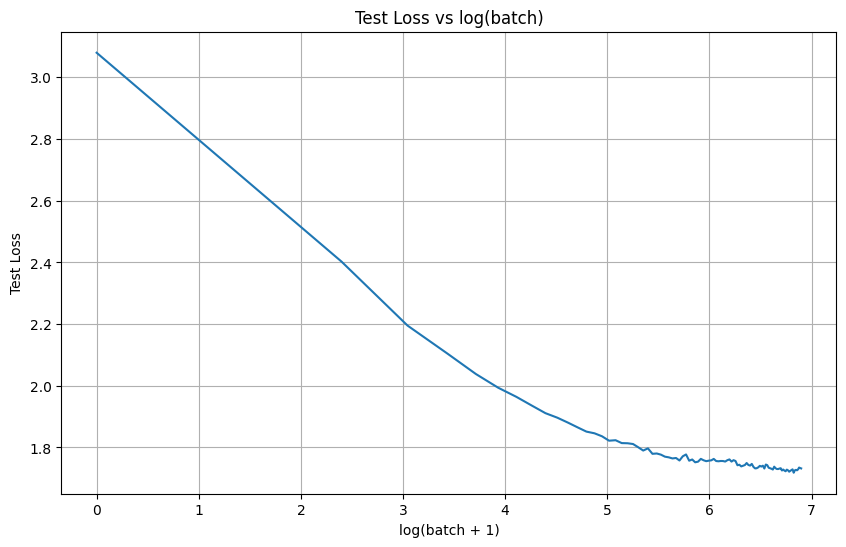

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Create x-axis values for batches where test losses were recorded
test_batch_indices = [i for i in range(0, len(losses), 10) if i // 10 < len(test_losses)]

plt.figure(figsize=(10, 6))
plt.plot(np.log(np.array(test_batch_indices) + 1), test_losses[:len(test_batch_indices)])
plt.xlabel('log(batch + 1)')
plt.ylabel('Test Loss')
plt.title('Test Loss vs log(batch)')
plt.grid(True)
plt.show()

/tmp/ipykernel_878/204604594.py:17: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


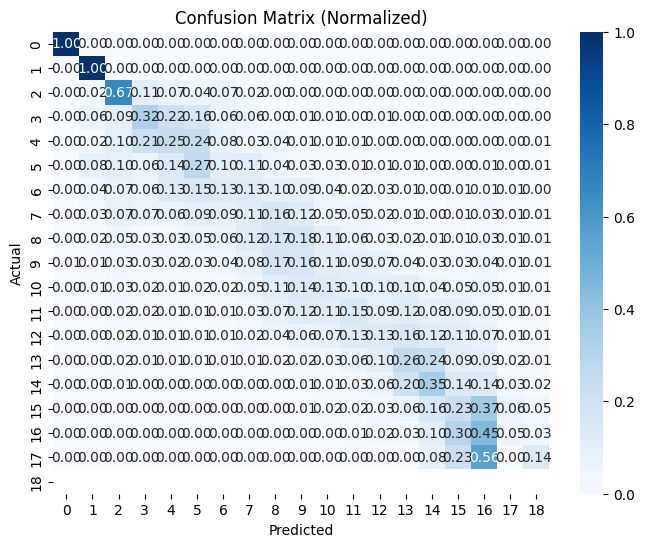

In [196]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

all_preds = []
all_targets = []

for X, y, _ in test_dataloader:
    with torch.no_grad():
        preds = model(X.to('cuda'))
        y_transformed = bin_y(y)
        all_preds.extend(preds.argmax(dim=1).cpu().numpy())
        all_targets.extend(y_transformed.cpu().numpy())

cm = confusion_matrix(all_targets, all_preds)
# Normalize each row so it sums to 1
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.title('Confusion Matrix (Normalized)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Misc plots

In [17]:
import torch
import matplotlib.pyplot as plt
import  numpy as np

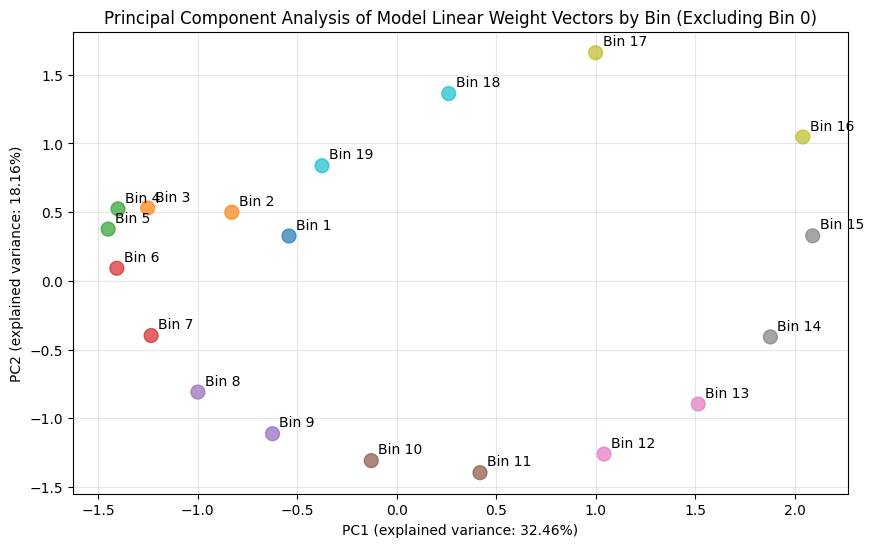

<Figure size 1200x800 with 0 Axes>

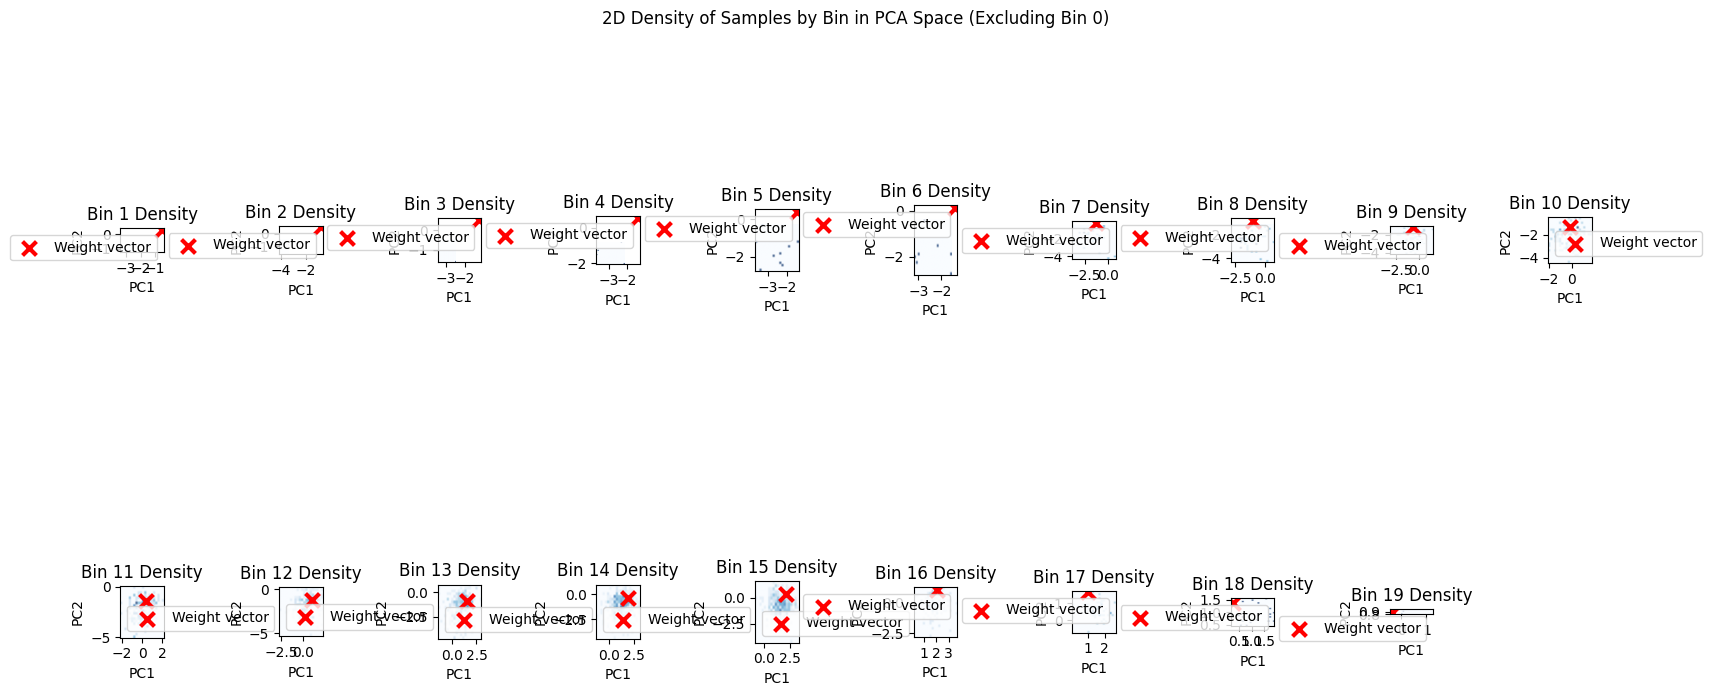

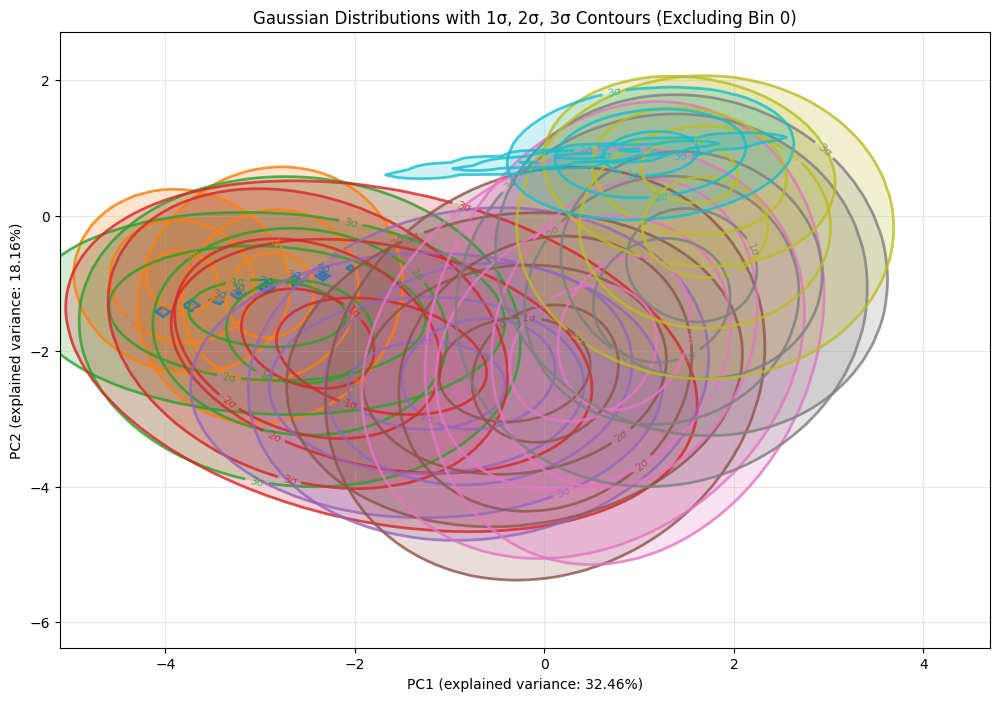

Principal Component Vectors (excluding bin 0):
PC1: [ 0.02190378 -0.02267173 -0.00034216 ... -0.00779406  0.02107582
 -0.03740139]
PC2: [-0.00309545  0.01650599 -0.00261361 ...  0.00012299  0.01638614
 -0.00952297]
Explained variance ratio: [0.32460704 0.18161805]


In [18]:
# Get the 2 principal component vectors
from sklearn.decomposition import PCA

# Use model.linear.weight instead of mean_vecs
# Convert to CPU for sklearn
#weight_tensor = torch.load('/workspace/llm-progress-monitor/weight_tensor.pt')
weight_tensor = model.linear.weight.to(dtype=torch.float32)
weight_vecs_cpu = weight_tensor.detach().cpu().numpy()
n_bins = weight_tensor.shape[0]

# Exclude bin 0 from PCA analysis
weight_vecs_no_zero = weight_vecs_cpu[1:]  # Exclude first bin (bin 0)

# Perform PCA to get 2 components
pca = PCA(n_components=2)
pca_result_no_zero = pca.fit_transform(weight_vecs_no_zero)

# Plot the principal components with different colors for each bin (excluding bin 0)
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10(np.linspace(0, 1, n_bins))
colors_no_zero = colors[1:]  # Exclude color for bin 0
plt.scatter(pca_result_no_zero[:, 0], pca_result_no_zero[:, 1], s=100, alpha=0.7, c=colors_no_zero)
for i, (x, y) in enumerate(pca_result_no_zero):
    plt.annotate(f'Bin {i+1}', (x, y), xytext=(5, 5), textcoords='offset points')
plt.xlabel(f'PC1 (explained variance: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 (explained variance: {pca.explained_variance_ratio_[1]:.2%})')
plt.title('Principal Component Analysis of Model Linear Weight Vectors by Bin (Excluding Bin 0)')
plt.grid(True, alpha=0.3)
plt.show()

# Plot 2D density of samples using colors (excluding bin 0)
plt.figure(figsize=(12, 8))
sample_count = 2000  # Number of samples per bin to plot
all_bin_data = []  # Collect all data

# First pass: collect all data (excluding bin 0)
for bin_idx in range(1, n_bins):  # Start from bin 1
    bin_samples = []
    for i, (X, y, _) in enumerate(train_dataloader):
        y_transformed = bin_y(y)
        mask = (y_transformed == bin_idx)
        if mask.any():
            bin_samples.append(X.to(dtype=torch.float32)[mask.cpu()].cpu())  # Move to CPU before appending
        if len(bin_samples) * train_dataloader.batch_size >= sample_count:
            break
    
    if bin_samples:
        # Concatenate and take only the first sample_count samples
        bin_data = torch.cat(bin_samples, dim=0)[:sample_count]
        bin_data_cpu = bin_data.numpy()  # Already on CPU
        all_bin_data.append(bin_data_cpu)

# Create a figure with subplots for each bin (excluding bin 0)
if all_bin_data:
    n_bins_no_zero = n_bins - 1
    fig, axes = plt.subplots(2, (n_bins + 1) // 2, figsize=(16, 8))
    axes = axes.flatten()
    
    # Plot density for each bin (excluding bin 0)
    for idx, bin_data_cpu in enumerate(all_bin_data):
        bin_pca = pca.transform(bin_data_cpu)
        
        # Create 2D histogram (density plot)
        ax = axes[idx]
        hist, xedges, yedges = np.histogram2d(bin_pca[:, 0], bin_pca[:, 1], bins=20)
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        
        im = ax.imshow(hist.T, extent=extent, origin='lower', cmap='Blues', alpha=0.7)
        ax.set_title(f'Bin {idx+1} Density')
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        
        # Add weight vector for this bin
        weight_pca = pca.transform(weight_vecs_no_zero[idx].reshape(1, -1))
        ax.scatter(weight_pca[0, 0], weight_pca[0, 1], s=100, c='red', 
                  marker='x', linewidth=3, label='Weight vector')
        ax.legend()
    
    # Hide unused subplots
    for idx in range(n_bins_no_zero, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle('2D Density of Samples by Bin in PCA Space (Excluding Bin 0)', y=1.02)
    plt.show()

# Combined density plot with Gaussian distributions (excluding bin 0)
plt.figure(figsize=(12, 8))
all_data_combined = np.concatenate(all_bin_data, axis=0)
all_pca = pca.transform(all_data_combined)

# Create bin labels for coloring (excluding bin 0)
bin_labels = []
for idx, bin_data_cpu in enumerate(all_bin_data):
    bin_labels.extend([idx+1] * len(bin_data_cpu))  # Bin indices start from 1
bin_labels = np.array(bin_labels)

# Calculate Gaussian distributions for each bin
from scipy.stats import multivariate_normal

# Get the overall extent for the plot
x_min, x_max = all_pca[:, 0].min() - 1, all_pca[:, 0].max() + 1
y_min, y_max = all_pca[:, 1].min() - 1, all_pca[:, 1].max() + 1

# Create a grid for plotting contours
x_grid = np.linspace(x_min, x_max, 100)
y_grid = np.linspace(y_min, y_max, 100)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
pos = np.dstack((X_grid, Y_grid))

# Define standard deviation levels
# For a 2D Gaussian, the probability levels corresponding to k-sigma are:
# 1σ: ~0.3935 probability (68.27% for 1D becomes 39.35% for 2D)
# 2σ: ~0.8647 probability (95.45% for 1D becomes 86.47% for 2D)
# 3σ: ~0.9889 probability (99.73% for 1D becomes 98.89% for 2D)
from scipy.stats import chi2

# For 2D case, chi2 with 2 degrees of freedom
sigma_1_level = chi2.ppf(0.3935, df=2)  # 1σ
sigma_2_level = chi2.ppf(0.8647, df=2)  # 2σ
sigma_3_level = chi2.ppf(0.9889, df=2)  # 3σ

# Plot Gaussian distributions for each bin (excluding bin 0)
for idx in range(len(all_bin_data)):
    bin_idx = idx + 1  # Actual bin index
    mask = bin_labels == bin_idx
    if mask.any():
        # Get PCA coordinates for this bin
        bin_pca = all_pca[mask]
        
        # Calculate mean and covariance for the Gaussian
        mean = np.mean(bin_pca, axis=0)
        cov = np.cov(bin_pca.T)
        
        # Add small regularization to avoid singular covariance matrices
        cov += np.eye(2) * 1e-6
        
        # Create multivariate normal distribution
        rv = multivariate_normal(mean, cov)
        
        # Calculate the maximum density (at the mean)
        max_density = rv.pdf(mean)
        
        # Convert chi2 levels to density levels
        # For multivariate normal: density = max_density * exp(-0.5 * chi2_level)
        density_1sigma = max_density * np.exp(-0.5 * sigma_1_level)
        density_2sigma = max_density * np.exp(-0.5 * sigma_2_level)
        density_3sigma = max_density * np.exp(-0.5 * sigma_3_level)
        
        # Plot the contours at 1σ, 2σ, and 3σ levels
        contour_levels = [density_3sigma, density_2sigma, density_1sigma]
        contour_labels = ['3σ', '2σ', '1σ']
        
        cs = plt.contour(X_grid, Y_grid, rv.pdf(pos), colors=[colors[bin_idx]], 
                        alpha=0.8, linewidths=2, levels=contour_levels)
        
        # Label the contours
        plt.clabel(cs, inline=True, fontsize=8, fmt=dict(zip(contour_levels, contour_labels)))
        
        plt.contourf(X_grid, Y_grid, rv.pdf(pos), colors=[colors[bin_idx]], 
                    alpha=0.2, levels=contour_levels + [max_density])

# Add weight vectors (excluding bin 0)
pca_result_centered = pca.transform(weight_vecs_no_zero)


plt.xlabel(f'PC1 (explained variance: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 (explained variance: {pca.explained_variance_ratio_[1]:.2%})')
plt.title('Gaussian Distributions with 1σ, 2σ, 3σ Contours (Excluding Bin 0)')
plt.grid(True, alpha=0.3)
plt.show()

# Show the principal component vectors themselves
print("Principal Component Vectors (excluding bin 0):")
print(f"PC1: {pca.components_[0]}")
print(f"PC2: {pca.components_[1]}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

In [22]:
# 3D PCA Visualization of weight_tensor with Plotly (interactive, draggable)
# Now with a line connecting the points in order!
import numpy as np
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.interpolate import UnivariateSpline

# Get weight_tensor and convert to numpy
weight_data = weight_tensor.detach().cpu().numpy()

# If it's multi-dimensional, flatten to 2D (rows x features)
if weight_data.ndim > 2:
    weight_data = weight_data.reshape(weight_data.shape[0], -1)

# Standardize the data before PCA
scaler = StandardScaler()
weight_data_scaled = scaler.fit_transform(weight_data)

# Perform PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
pca_result = pca.fit_transform(weight_data_scaled)

# Create labels (just indices)
point_labels = [str(i) for i in range(len(pca_result))]

# Create parameter t for interpolation (using indices)
t = np.arange(len(pca_result))

# Create smooth spline curves through the points
# Using a smoothing factor to create a nice curve
smoothing_factor = 0.5  # Adjust this: 0 = pass through all points, higher = smoother
t_smooth = np.linspace(0, len(pca_result) - 1, 100)  # More points for smooth line

try:
    # Fit splines for each dimension
    spline_x = UnivariateSpline(t, pca_result[:, 0], s=smoothing_factor, k=min(3, len(t)-1))
    spline_y = UnivariateSpline(t, pca_result[:, 1], s=smoothing_factor, k=min(3, len(t)-1))
    spline_z = UnivariateSpline(t, pca_result[:, 2], s=smoothing_factor, k=min(3, len(t)-1))
    
    # Generate smooth line
    line_x = spline_x(t_smooth)
    line_y = spline_y(t_smooth)
    line_z = spline_z(t_smooth)
    
    use_spline = True
except:
    # Fallback to simple linear interpolation
    line_x = pca_result[:, 0]
    line_y = pca_result[:, 1]
    line_z = pca_result[:, 2]
    use_spline = False

# Create figure with both the line and points
fig = go.Figure()

# Add the smooth line through points
if use_spline:
    fig.add_trace(go.Scatter3d(
        x=line_x,
        y=line_y,
        z=line_z,
        mode='lines',
        name='Trajectory',
        line=dict(
            color='cyan',
            width=4
        ),
        hoverinfo='skip'
    ))
else:
    # Simple line connecting points in order
    fig.add_trace(go.Scatter3d(
        x=pca_result[:, 0],
        y=pca_result[:, 1],
        z=pca_result[:, 2],
        mode='lines',
        name='Trajectory',
        line=dict(
            color='cyan',
            width=4
        ),
        hoverinfo='skip'
    ))

# Add scatter points on top
fig.add_trace(go.Scatter3d(
    x=pca_result[:, 0],
    y=pca_result[:, 1],
    z=pca_result[:, 2],
    mode='markers+text',
    name='Weight Vectors',
    text=point_labels,
    textposition='top center',
    marker=dict(
        size=6,
        color=np.arange(len(pca_result)),
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title="Index"),
        line=dict(width=0.5, color='white')
    ),
    hovertemplate='<b>Index: %{text}</b><br>PC1: %{x:.3f}<br>PC2: %{y:.3f}<br>PC3: %{z:.3f}<extra></extra>'
))

fig.update_layout(
    title=f'3D PCA of Weight Tensor with Trajectory (n={len(pca_result)} points)<br>' + 
          f'Explained variance: PC1={pca.explained_variance_ratio_[0]:.2%}, ' +
          f'PC2={pca.explained_variance_ratio_[1]:.2%}, ' +
          f'PC3={pca.explained_variance_ratio_[2]:.2%}',
    scene=dict(
        xaxis_title=f'PC1 ({pca.explained_variance_ratio_[0]:.1%})',
        yaxis_title=f'PC2 ({pca.explained_variance_ratio_[1]:.1%})',
        zaxis_title=f'PC3 ({pca.explained_variance_ratio_[2]:.1%})',
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.5)
        )
    ),
    width=900,
    height=700,
    template='plotly_dark',
    showlegend=True
)

fig.show()

print(f"Shape of weight_tensor: {weight_tensor.shape}")
print(f"Shape after PCA: {pca_result.shape}")
print(f"Total explained variance: {pca.explained_variance_ratio_.sum():.2%}")
print(f"Line type: {'Smooth spline curve' if use_spline else 'Linear interpolation'}")

Shape of weight_tensor: torch.Size([20, 2560])
Shape after PCA: (20, 3)
Total explained variance: 51.89%
Line type: Smooth spline curve


In [23]:
# Save the interactive 3D plot as an HTML file
import plotly.io as pio

# Save as standalone HTML file
html_filename = 'weight_tensor_3d_pca_visualization.html'
pio.write_html(fig, html_filename, auto_open=False)

print(f"✓ Saved interactive 3D plot to: {html_filename}")
print(f"  You can open this file in any web browser to view and interact with the 3D plot")
print(f"  The file is fully self-contained and can be shared with others")

# Also save a static image if you need a screenshot (requires kaleido)
try:
    image_filename = 'weight_tensor_3d_pca_visualization.png'
    fig.write_image(image_filename, width=1200, height=900)
    print(f"✓ Also saved static image to: {image_filename}")
except Exception as e:
    print(f"  Note: To save static images, install kaleido with: pip install kaleido")
    print(f"  (HTML file is already saved and fully interactive!)")

✓ Saved interactive 3D plot to: weight_tensor_3d_pca_visualization.html
  You can open this file in any web browser to view and interact with the 3D plot
  The file is fully self-contained and can be shared with others
  Note: To save static images, install kaleido with: pip install kaleido
  (HTML file is already saved and fully interactive!)


Number of consecutive pairs: 19

PCA Space (3D) distances:
  Mean: 15.6498
  Std: 10.0279
  Min: 3.7790
  Max: 45.3429

Full Dimensional Space (scaled) distances:
  Mean: 52.3934
  Std: 13.7169
  Min: 38.7350
  Max: 82.7827

Full Dimensional Space (original) distances:
  Mean: 2.0076
  Std: 0.5657
  Min: 1.3193
  Max: 3.2923


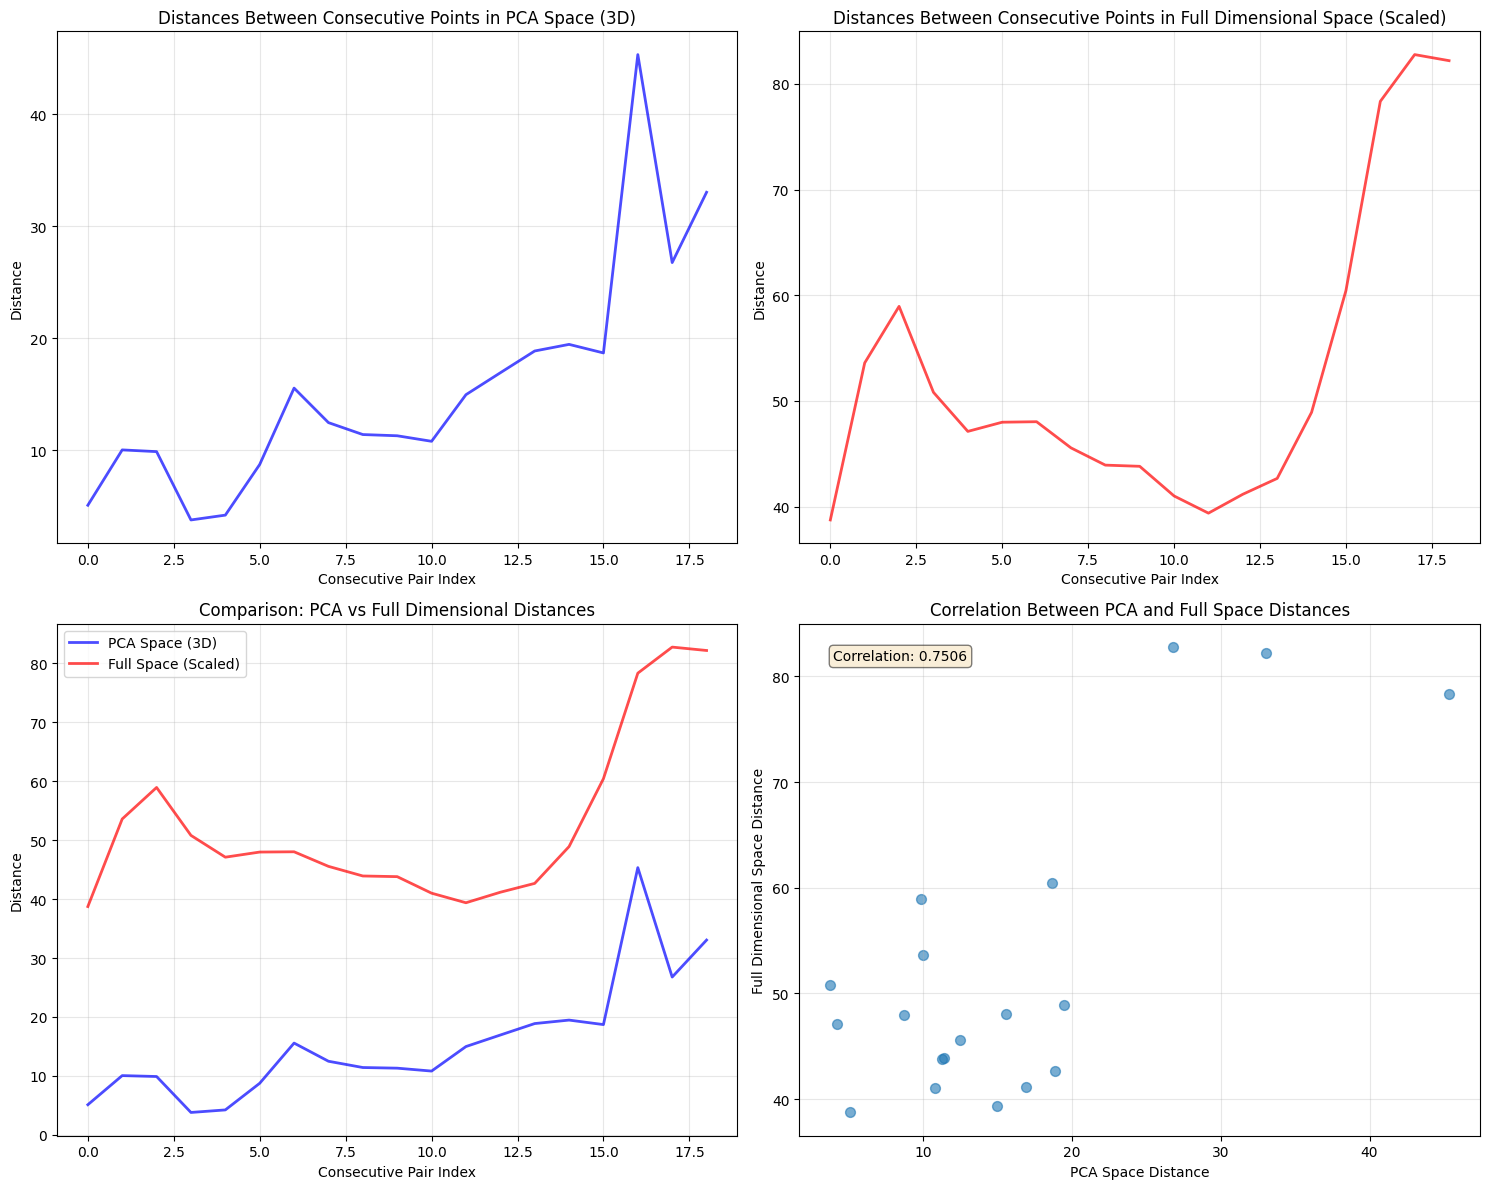


CONSECUTIVE POINT DISTANCES
  Pair | From ->   To |   PCA Dist | Full Dist (scaled) |  Full Dist (orig)
--------------------------------------------------------------------------------
     0 |    0 ->    1 |     5.0917 |            38.7350 |            1.3193
     1 |    1 ->    2 |    10.0362 |            53.6025 |            1.8846
     2 |    2 ->    3 |     9.8815 |            58.9523 |            2.1601
     3 |    3 ->    4 |     3.7790 |            50.8164 |            1.8969
     4 |    4 ->    5 |     4.2103 |            47.1169 |            1.7513
     5 |    5 ->    6 |     8.7337 |            47.9871 |            1.7980
     6 |    6 ->    7 |    15.5546 |            48.0336 |            1.8417
     7 |    7 ->    8 |    12.4729 |            45.5594 |            1.7422
     8 |    8 ->    9 |    11.4071 |            43.9254 |            1.7070
     9 |    9 ->   10 |    11.2982 |            43.8130 |            1.7146
    10 |   10 ->   11 |    10.8044 |            41.005

In [20]:
# Calculate distances between consecutive points in both PCA space and full dimensional space
import numpy as np
import matplotlib.pyplot as plt

# Calculate distances in PCA space (3D)
pca_distances = []
for i in range(len(pca_result) - 1):
    dist = np.linalg.norm(pca_result[i+1] - pca_result[i])
    pca_distances.append(dist)

# Calculate distances in full dimensional space (using scaled data)
full_distances = []
for i in range(len(weight_data_scaled) - 1):
    dist = np.linalg.norm(weight_data_scaled[i+1] - weight_data_scaled[i])
    full_distances.append(dist)

# Also calculate using original (unscaled) data for comparison
original_distances = []
for i in range(len(weight_data) - 1):
    dist = np.linalg.norm(weight_data[i+1] - weight_data[i])
    original_distances.append(dist)

print(f"Number of consecutive pairs: {len(pca_distances)}")
print(f"\nPCA Space (3D) distances:")
print(f"  Mean: {np.mean(pca_distances):.4f}")
print(f"  Std: {np.std(pca_distances):.4f}")
print(f"  Min: {np.min(pca_distances):.4f}")
print(f"  Max: {np.max(pca_distances):.4f}")

print(f"\nFull Dimensional Space (scaled) distances:")
print(f"  Mean: {np.mean(full_distances):.4f}")
print(f"  Std: {np.std(full_distances):.4f}")
print(f"  Min: {np.min(full_distances):.4f}")
print(f"  Max: {np.max(full_distances):.4f}")

print(f"\nFull Dimensional Space (original) distances:")
print(f"  Mean: {np.mean(original_distances):.4f}")
print(f"  Std: {np.std(original_distances):.4f}")
print(f"  Min: {np.min(original_distances):.4f}")
print(f"  Max: {np.max(original_distances):.4f}")

# Create plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: PCA distances over consecutive pairs
axes[0, 0].plot(range(len(pca_distances)), pca_distances, 'b-', linewidth=2, alpha=0.7)
axes[0, 0].set_xlabel('Consecutive Pair Index')
axes[0, 0].set_ylabel('Distance')
axes[0, 0].set_title('Distances Between Consecutive Points in PCA Space (3D)')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Full dimensional distances over consecutive pairs
axes[0, 1].plot(range(len(full_distances)), full_distances, 'r-', linewidth=2, alpha=0.7)
axes[0, 1].set_xlabel('Consecutive Pair Index')
axes[0, 1].set_ylabel('Distance')
axes[0, 1].set_title('Distances Between Consecutive Points in Full Dimensional Space (Scaled)')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Comparison of both on same plot
axes[1, 0].plot(range(len(pca_distances)), pca_distances, 'b-', linewidth=2, alpha=0.7, label='PCA Space (3D)')
axes[1, 0].plot(range(len(full_distances)), full_distances, 'r-', linewidth=2, alpha=0.7, label='Full Space (Scaled)')
axes[1, 0].set_xlabel('Consecutive Pair Index')
axes[1, 0].set_ylabel('Distance')
axes[1, 0].set_title('Comparison: PCA vs Full Dimensional Distances')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Scatter plot showing correlation between PCA and full distances
axes[1, 1].scatter(pca_distances, full_distances, alpha=0.6, s=50)
axes[1, 1].set_xlabel('PCA Space Distance')
axes[1, 1].set_ylabel('Full Dimensional Space Distance')
axes[1, 1].set_title('Correlation Between PCA and Full Space Distances')
axes[1, 1].grid(True, alpha=0.3)

# Calculate and display correlation
correlation = np.corrcoef(pca_distances, full_distances)[0, 1]
axes[1, 1].text(0.05, 0.95, f'Correlation: {correlation:.4f}', 
                transform=axes[1, 1].transAxes, 
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Create a dataframe-like output showing pairs
print("\n" + "="*80)
print("CONSECUTIVE POINT DISTANCES")
print("="*80)
print(f"{'Pair':>6} | {'From':>4} -> {'To':>4} | {'PCA Dist':>10} | {'Full Dist (scaled)':>18} | {'Full Dist (orig)':>17}")
print("-"*80)
for i in range(len(pca_distances)):
    print(f"{i:6d} | {i:4d} -> {i+1:4d} | {pca_distances[i]:10.4f} | {full_distances[i]:18.4f} | {original_distances[i]:17.4f}")


In [24]:
# Show explained variance ratio for each principal component (5 components)
pca_5 = PCA(n_components=5)
pca_5.fit(weight_vecs_no_zero)

cumulative_variance = 0
for i in range(5):
    individual_variance = pca_5.explained_variance_ratio_[i]
    cumulative_variance += individual_variance
    print(f"PC{i+1} explained variance: {individual_variance:.2%} (cumulative: {cumulative_variance:.2%})")


PC1 explained variance: 32.46% (cumulative: 32.46%)
PC2 explained variance: 18.16% (cumulative: 50.62%)
PC3 explained variance: 8.98% (cumulative: 59.61%)
PC4 explained variance: 6.84% (cumulative: 66.45%)
PC5 explained variance: 5.44% (cumulative: 71.89%)


In [25]:
torch.save(model.linear.weight, '/workspace/llm-progress-monitor/qwen3_4b_weight_tensor.pt')

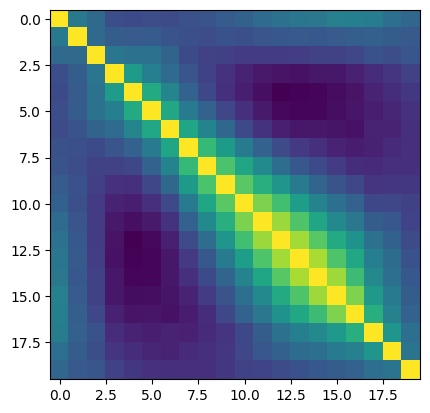

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(model.linear.weight.detach().cpu().to(torch.float32).numpy())
plt.imshow(similarity_matrix, cmap='viridis')

### Varying layer code

In [ ]:
from torch.utils.data import DataLoader, Dataset
from typing import List
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import gc
import os
from sklearn.model_selection import train_test_split

In [ ]:
loss_fn = nn.CrossEntropyLoss()

In [ ]:
class LogBinClassifier(nn.Module):
        def __init__(self,input_dim: int, n_bins: int):
            super().__init__()
            self.linear = nn.Linear(input_dim, n_bins)

        def forward(self, x):
            return self.linear(x)

class TokensRemainingDataset(Dataset):
        def __init__(self, activations: List[torch.Tensor]):
            self.data = []
            for activation in activations:
                for i in range(activation.shape[0]):
                    self.data.append((activation[i, :], activation.shape[0] - i, activation.shape[0]))

        def __len__(self):
            return len(self.data)
        
        def __getitem__(self, idx):
            return self.data[idx]
def bin_y(y, n_bins: int):
    return (y+1).log().floor().clamp(0,n_bins-1).to('cuda', dtype=torch.long)

In [ ]:

def load_train_and_test_activations(layer_idx: int, n_bins: int = 8, n_train: int = 10000, return_model: bool = False):
    activations_dir = '/workspace/llm-progress-monitor/rollouts/activations'
    activations = []
    with torch.no_grad():
        for i in range(len(os.listdir(activations_dir))): #TODO: remove min
            if i % 10 == 0:
                print(f"Loaded {i} activations")
                gc.collect()
                torch.cuda.empty_cache()
            filename = f'{i}.pt'
            if os.path.exists(os.path.join(activations_dir, filename)):
                activations.append(torch.load(os.path.join(activations_dir, filename))[layer_idx].to('cpu'))
    # Train-test split on activations


    train_activations, test_activations = train_test_split(activations, test_size=0.2, random_state=42)
    print(f"Train set size: {len(train_activations)}")
    print(f"Test set size: {len(test_activations)}")

    

    train_dataset = TokensRemainingDataset(train_activations)
    train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_dataset = TokensRemainingDataset(test_activations)
    test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

        
    model = LogBinClassifier(train_dataset[0][0].shape[0], n_bins).to('cuda')
    adam = optim.Adam(model.parameters(), lr=0.0001)
    # Calculate class frequencies from training data
    class_counts = torch.zeros(n_bins)
    total_samples = 0

    for X, y, _ in train_dataloader:
        y_binned = bin_y(y, n_bins)
        for i in range(n_bins):
            class_counts[i] += (y_binned == i).sum().item()
        total_samples += len(y)

    # Calculate inverse frequency weights
    weight = total_samples / (n_bins * class_counts)
    weight = weight.to('cuda', dtype=torch.float32)
    print("Class frequencies:", class_counts)
    print("Weights:", weight)
    losses = []

    test_losses = []

    for i, (X, y, _) in enumerate(train_dataloader):
        model.zero_grad()
        preds = model(X.to('cuda'))
        y_transformed = bin_y(y, n_bins)
        loss = loss_fn(preds, y_transformed)
        loss.backward()
        adam.step()
        losses.append(loss.item())
        
        # Calculate test loss
        if i % 10 == 0:  # Calculate test loss every 10 batches
            model.eval()
            test_loss_sum = 0
            test_batches = 0
            with torch.no_grad():
                for X_test, y_test, _ in test_dataloader:
                    preds_test = model(X_test.to('cuda'))
                    y_test_transformed = bin_y(y_test, n_bins)
                    test_loss = loss_fn(preds_test, y_test_transformed)
                    test_loss_sum += test_loss.item()
                    test_batches += 1
            test_losses.append(test_loss_sum / test_batches)
            model.train()
        
        print(f"Batch {i}, Train Loss: {loss.item():.4f}")
        if i % 10 == 0 and test_losses:
            print(f"Test Loss: {test_losses[-1]:.4f}")
        if i >= n_train:
            break
    if return_model:
        return losses, test_losses, model
    else:
        return losses, test_losses

In [ ]:
losses_dict = {}
test_losses_dict = {} #maps layer_idx to losses and test_losses
for layer_idx in [0,5,10,15,20,25]:
    gc.collect()
    torch.cuda.empty_cache()
    losses, test_losses = load_train_and_test_activations(layer_idx)
    losses_dict[layer_idx] = losses
    test_losses_dict[layer_idx] = test_losses

In [ ]:
import json

# Save the losses dictionaries to JSON files
with open('losses_dict.json', 'w') as f:
    json.dump(losses_dict, f, indent=2)

with open('test_losses_dict.json', 'w') as f:
    json.dump(test_losses_dict, f, indent=2)

print("Saved losses_dict.json and test_losses_dict.json")


In [ ]:
import matplotlib.pyplot as plt

# Plot the training losses for each layer
plt.figure(figsize=(12, 8))

for layer_idx, losses in losses_dict.items():
    plt.plot(losses, label=f'Layer {layer_idx}', alpha=0.8)

plt.xlabel('Training Step')
plt.ylabel('Training Loss')
plt.title('Training Losses by Layer')
plt.ylim(0, 2)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Also plot test losses if available
if test_losses_dict:
    plt.figure(figsize=(12, 8))
    
    for layer_idx, test_losses in test_losses_dict.items():
        if test_losses:  # Only plot if there are test losses
            plt.plot(test_losses, label=f'Layer {layer_idx} (Test)', alpha=0.8, linestyle='--')
    
    plt.xlabel('Evaluation Step')
    plt.ylabel('Test Loss')
    plt.title('Test Losses by Layer')
    plt.ylim(0, 2)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plot the training losses for each layer with log x-axis
plt.figure(figsize=(12, 8))

for layer_idx, losses in losses_dict.items():
    plt.semilogx(losses, label=f'Layer {layer_idx}', alpha=0.8)

plt.xlabel('Training Step (log scale)')
plt.ylabel('Training Loss')
plt.title('Training Losses by Layer (Log X-axis)')
plt.ylim(0, 2)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Also plot test losses if available with log x-axis
if test_losses_dict:
    plt.figure(figsize=(12, 8))
    
    for layer_idx, test_losses in test_losses_dict.items():
        if test_losses:  # Only plot if there are test losses
            plt.semilogx(test_losses, label=f'Layer {layer_idx} (Test)', alpha=0.8, linestyle='--')
    
    plt.xlabel('Evaluation Step (log scale)')
    plt.ylabel('Test Loss')
    plt.title('Test Losses by Layer (Log X-axis)')
    plt.ylim(0, 5)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


More data probably doesnt help at this point

In [ ]:
losses, test_losses, model = load_train_and_test_activations(15, return_model=True)

In [ ]:
weight_tensor = model.linear.weight
torch.save(weight_tensor, 'weight_tensor.pt')
weight_tensor

In [ ]:
from sklearn.decomposition import PCA

# Get the weight tensor and convert to numpy for PCA
weight_numpy = weight_tensor.detach().cpu().numpy()

# Fit PCA to find the 2 principal components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(weight_numpy)

print(f"Shape of weight tensor: {weight_tensor.shape}")
print(f"Shape after PCA: {pca_result.shape}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {pca.explained_variance_ratio_.sum():.4f}")

# Plot the principal components
plt.figure(figsize=(10, 8))
# Number each point with its index
for i in range(len(pca_result)):
    plt.scatter(pca_result[i, 0], pca_result[i, 1], alpha=0.6)
    plt.annotate(str(i), (pca_result[i, 0], pca_result[i, 1]), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.3f} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.3f} variance)')
plt.title('Weight Matrix Projected onto First 2 Principal Components')
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
pca_tensor = torch.tensor(pca.components_)

In [ ]:
from einops import einsum

In [ ]:
import pandas as pd

In [ ]:
import torch

weight_tensor = torch.load('/workspace/llm-progress-monitor/weight_tensor.pt')

# Get the top 2 principal components (2304-dimensional vectors)
from sklearn.decomposition import PCA

# Convert to numpy for sklearn
weight_numpy = weight_tensor.cpu().detach().numpy()

# Fit PCA to get the principal components
pca = PCA(n_components=2)
pca.fit(weight_numpy)

# Get the 2 principal component vectors (each 2304-dimensional)
pca_components = torch.tensor(pca.components_, dtype=weight_tensor.dtype, device=weight_tensor.device)

print(f"Original shape: {weight_tensor.shape}")
print(f"PCA components shape: {pca_components.shape}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
pca_components

In [ ]:
weight_tensor = torch.load('/workspace/llm-progress-monitor/qwen3_4b_weight_tensor.pt')

In [ ]:
import random
random.seed(42)

In [ ]:
def get_ema_preds(log_preds, alpha=0.99):
    given_alpha = alpha
    preds_list = log_preds.exp().tolist()
    
    ema_preds = []
    cur_ema = None
    for i,pred in enumerate(preds_list):
        if pred < 10:
            alpha = 0.5
        else:
            alpha = given_alpha
        if cur_ema is None:
            cur_ema = pred
        else:
            cur_ema = alpha*(cur_ema-1) + (1-alpha)*pred #-1 because we have stepped one token
        ema_preds.append(cur_ema)
    return ema_preds

for i in range(10):
    idx = random.randint(0, len(test_activations)-1)
    log_preds = einsum(
        einsum(test_activations[idx].to('cuda'), weight_tensor, 'seq d_model, pca d_model -> seq pca').softmax(dim=1),
        0.5+torch.arange(weight_tensor.shape[0]).to('cuda', dtype=torch.bfloat16),
        'seq pca, pca -> seq'
    )
    
    ema_preds = get_ema_preds(log_preds)
    plt.plot(ema_preds)
plt.xlabel('Actual Tokens')
plt.ylabel('Predicted Tokens')
plt.title('Prediction Remaining Over Generation')
plt.axhline(0, color='black', linestyle='--')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [ ]:
def get_log_preds(activation, weight_tensor):
    return einsum(
        einsum(activation.to('cuda'), weight_tensor, 'seq d_model, pca d_model -> seq pca').softmax(dim=1),
        0.5+torch.arange(weight_tensor.shape[0]).to('cuda', dtype=torch.bfloat16),
        'seq pca, pca -> seq'
    )

# Get predictions for all test activations
dataset = []

for idx in range(len(test_activations)):
    log_preds = get_log_preds(test_activations[idx], weight_tensor)
    ema_preds = get_ema_preds(log_preds)
    for token_idx, pred in enumerate(ema_preds):
        percent_pred = token_idx/(token_idx + pred)
        percent_actual = token_idx/(len(log_preds))
        dataset.append((percent_actual, percent_pred))
dataset_tensor = torch.tensor(dataset)

In [ ]:
plt.title('Actual vs Predicted Percent')
plt.scatter(dataset_tensor[:,0], dataset_tensor[:,1], alpha=0.1, s=1)
plt.plot([0, 1], [0, 1], 'r-', label='y=x')
plt.xlabel('Actual Percent')
plt.ylabel('Predicted Percent')

# Calculate R-squared
x = dataset_tensor[:,0]
y = dataset_tensor[:,1]
mean_y = torch.mean(y)
ss_tot = torch.sum((y - mean_y) ** 2)
ss_res = torch.sum((y - x) ** 2)  # assuming perfect prediction would be y = x
r_squared = 1 - (ss_res / ss_tot)
print(f"R-squared: {r_squared.item():.4f}")

# Calculate mean absolute difference
mean_abs_diff = torch.mean(torch.abs(y - x))
print(f"Mean absolute difference: {mean_abs_diff.item():.4f}")